In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime

In [2]:
homeprice=pd.read_csv('../Inputs/GDPInputs/Sale_Prices_Zip.csv')
business=pd.read_csv('../Inputs/GDPInputs/Licensed_Businesses_WA.csv')
pot_sales=pd.read_csv('../Inputs/GDPInputs/Sales_and_Tax_Report_WA.csv')

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
wa_all_hp=homeprice.loc[homeprice['StateName']=='Washington',:]
wa_all_hp.rename(columns={'RegionName':'Zip'},inplace=True)
wa_all_hp.head()

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,RegionID,Zip,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
39,99534.0,98052,Washington,40,431100.0,429300.0,419000.0,412800.0,413100.0,454500.0,...,671300.0,703600.0,755600.0,777800.0,779300.0,745200.0,752200.0,786200.0,806100.0,803200.0
93,99500.0,98012,Washington,94,384900.0,375100.0,364300.0,374900.0,368100.0,372600.0,...,554800.0,575700.0,581500.0,587000.0,590200.0,591600.0,580500.0,556500.0,535300.0,533400.0
119,99563.0,98103,Washington,120,NaN,NaN,NaN,NaN,NaN,NaN,...,757500.0,781200.0,775700.0,803300.0,799400.0,757800.0,742900.0,771600.0,808800.0,788000.0
211,99961.0,98682,Washington,212,225100.0,221700.0,218100.0,213700.0,216400.0,210600.0,...,300900.0,306700.0,310000.0,309000.0,306400.0,307300.0,305200.0,307300.0,312800.0,319800.0
252,99589.0,98133,Washington,253,318100.0,338700.0,322100.0,336900.0,332500.0,324300.0,...,552800.0,551600.0,544000.0,533000.0,559000.0,566400.0,551600.0,552300.0,545900.0,569100.0


In [4]:
business.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,Zip,CreateDate,DayPhone
0,BEAUSOLEIL,ACTIVE (ISSUED),416694,6033541680010000,MARIJUANA PRODUCER TIER 3/MARIJUANA PROCESSOR,7903 BEAVER VALLEY RD STE A,NaN,CHIMACUM,WA,JEFFERSON,983250000,20171229,2.253299e+09
1,'OH' MCDONALD FARMS,ACTIVE (ISSUED),413650,6034429790010000,MARIJUANA PRODUCER TIER 2/MARIJUANA PROCESSOR,250 W AXTON RD,NaN,BELLINGHAM,WA,WHATCOM,982267315,20171104,3.609667e+09
2,POT ZONE,ACTIVE (ISSUED),415229,6033538680010000,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,983669599,20171114,2.533127e+09
3,BEST BUDS MARKETING AND DISTRIBUTION,ACTIVE (ISSUED),425431,6041333310010000,MARIJUANA TRANSPORTATION,1206 N DOLARWAY RD STE 116,NaN,ELLENSBURG,WA,KITTITAS,989268392,20171115,2.064095e+09
4,RED FROG,ACTIVE (ISSUED),412437,6033472750010000,MARIJUANA PRODUCER TIER 3/MARIJUANA PROCESSOR,12815 227TH AVE SE STE A,STE A,MONROE,WA,SNOHOMISH,982728720,20171130,3.608059e+09


In [5]:
retailers=business.loc[(business['Type']=='MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT') | (business['Type']=='MARIJUANA RETAILER'),: ]

In [6]:
retailers.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,Zip,CreateDate,DayPhone
2,POT ZONE,ACTIVE (ISSUED),415229,6033538680010000,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,983669599,20171114,2.533127e+09
6,ALTITUDE,ACTIVE (ISSUED),414225,6033570900010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,260 MERLOT DR,NaN,PROSSER,WA,BENTON,993500000,20171114,5.097864e+09
18,DOCKSIDE CANNABIS,ACTIVE (ISSUED),414174,6033563140010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,1728 4TH AVE S,NaN,SEATTLE,WA,KING,981340000,20171214,2.062236e+09
21,FILLABONG,ACTIVE (ISSUED),415211,6035601210010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,2839 NW KITSAP PL STE A,NaN,SILVERDALE,WA,KITSAP,983839447,20171023,3.606980e+09
25,HERBAL NATION,ACTIVE (ISSUED),413683,6034896600010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,19302 BOTHELL EVERETT HWY,NaN,BOTHELL,WA,SNOHOMISH,980127113,20180306,4.254861e+09


In [7]:
retailers['UBI']=retailers.UBI.astype(str).apply(lambda x: x[:9])

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
retailers.dropna(subset=['UBI'],inplace=True)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
retailers['UBI']=retailers['UBI'].astype(int)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
pot_sales=pot_sales.loc[pot_sales['Total Sales'] != 0,:]
pot_sales.dropna(subset=['UBI'],inplace=True)
pot_sales.head()

,Trade Name,License Number,UBI,Privilege Code,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year
2,HONU ENTERPRISES,412097,603341347,393,9/1/2016,9/30/2016,318638.59,0.00,0.00,Confirmed,10/18/2016,2017
3,MILLER'S MARIJUANA,415001,603358103,0394 0395,9/1/2015,9/30/2015,91718.76,33935.94,33935.94,Confirmed,10/19/2015,2016
5,HERBSCAPES,412670,601264180,391,12/1/2014,12/31/2014,4956.00,1239.00,1239.00,Confirmed,1/15/2015,2015
6,AISLING ENTERPRISES,413288,602990684,391,5/1/2016,5/31/2016,1407.00,0.00,0.00,Confirmed,6/20/2016,2016
8,THE SUNSHINE TIKI HUT,417198,602883407,393,10/1/2016,10/31/2016,23714.25,0.00,0.00,Unconfirmed,NaN,2017


In [11]:
ret_sales=retailers.merge(pot_sales,on='UBI')

In [12]:
ret_sales.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,...,License Number,Privilege Code,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year
0,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,12/1/2014,12/31/2014,168401.31,42100.33,42100.33,Confirmed,1/2/2015,2015
1,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,7/1/2016,7/31/2016,402176.18,148805.19,148805.19,Confirmed,8/11/2016,2017
2,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,8/1/2014,8/31/2014,35100.00,8775.00,8775.00,Confirmed,9/8/2014,2015
3,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,4/1/2016,4/30/2016,325055.49,120270.53,120270.53,Confirmed,5/12/2016,2016
4,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,9/1/2016,9/30/2016,403418.30,149264.77,149264.77,Confirmed,10/12/2016,2017


In [13]:
ret_sales[['Sales Month','Date','Sales Year']] = ret_sales['Period End'].str.split('/',expand=True)
ret_sales.drop(columns={'Date'},inplace=True)

In [14]:
#list(ret_sales)

In [15]:
ret_sales['Zip']=ret_sales['Zip'].astype(str).apply(lambda x: x[:5]).astype(int)
ret_sales['Sales Month']=ret_sales['Sales Month']+'/'+ret_sales['Sales Year']

In [16]:
ret_sales.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,...,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year,Sales Month,Sales Year
0,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,12/1/2014,12/31/2014,168401.31,42100.33,42100.33,Confirmed,1/2/2015,2015,12/2014,2014
1,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,7/1/2016,7/31/2016,402176.18,148805.19,148805.19,Confirmed,8/11/2016,2017,7/2016,2016
2,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,8/1/2014,8/31/2014,35100.00,8775.00,8775.00,Confirmed,9/8/2014,2015,8/2014,2014
3,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,4/1/2016,4/30/2016,325055.49,120270.53,120270.53,Confirmed,5/12/2016,2016,4/2016,2016
4,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,9/1/2016,9/30/2016,403418.30,149264.77,149264.77,Confirmed,10/12/2016,2017,9/2016,2016


In [17]:
#monthly_sales_by_zip=pd.DataFrame(ret_sales.groupby(['Zip','Sales Year','Sales Month'])['Total Sales'].sum())

In [18]:
# monthly_sales_by_zip.reset_index(inplace=True)

In [19]:
# monthly_sales_by_zip['Sales Month']=monthly_sales_by_zip['Sales Month']+'/'+monthly_sales_by_zip['Sales Year']
# monthly_sales_by_zip.head()

In [20]:
df=pd.crosstab(ret_sales['Zip'],ret_sales['Sales Month'],values=ret_sales['Total Sales'],aggfunc=np.sum)

In [21]:
cols=df.columns.tolist()
dates=[datetime.datetime.strptime(ts,'%m/%Y') for ts in cols]
dates.sort()
sorteddates=[datetime.datetime.strftime(ts,'%#m/%Y') for ts in dates]
sorteddates

['7/2014',
 '8/2014',
 '9/2014',
 '10/2014',
 '11/2014',
 '12/2014',
 '1/2015',
 '2/2015',
 '3/2015',
 '4/2015',
 '5/2015',
 '6/2015',
 '7/2015',
 '8/2015',
 '9/2015',
 '10/2015',
 '11/2015',
 '12/2015',
 '1/2016',
 '2/2016',
 '3/2016',
 '4/2016',
 '5/2016',
 '6/2016',
 '7/2016',
 '8/2016',
 '9/2016',
 '10/2016',
 '11/2016',
 '12/2016',
 '1/2017',
 '2/2017',
 '3/2017',
 '4/2017',
 '5/2017',
 '6/2017',
 '7/2017',
 '8/2017',
 '9/2017',
 '10/2017']

In [22]:
df=df[sorteddates]
df

Sales Month,7/2014,8/2014,9/2014,10/2014,11/2014,12/2014,1/2015,2/2015,3/2015,4/2015,...,1/2017,2/2017,3/2017,4/2017,5/2017,6/2017,7/2017,8/2017,9/2017,10/2017
Zip,,,,,,,,,,,,,,,,,,,,,
94140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103152.44,119668.85,130258.65
98002,NaN,NaN,NaN,NaN,15761.40,59842.53,101088.68,135106.09,191242.75,248284.60,...,1485788.14,1445597.79,1614428.31,1528860.22,1507238.46,1501753.85,1516468.80,1544406.41,1595697.58,1560214.93
98003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.00,80.00,80.00,60.00,80.00,NaN,NaN,NaN,NaN,NaN
98004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22985.70,63083.46,120910.98,...,695024.26,643407.14,665652.26,614924.25,637274.01,303372.55,467381.17,526866.73,528149.70,504098.33
98005,NaN,NaN,NaN,NaN,106287.31,204653.61,303957.17,325705.58,391733.58,380528.50,...,925529.77,846773.99,964477.31,1000621.23,645371.43,535765.11,591410.33,586454.07,928636.15,907724.74
98006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,550204.35,493474.97,573679.34,620355.62,254681.24,71337.71,178335.89,163022.04,503712.93,500059.46
98007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63383.87,125188.06,168218.39,209497.54,251806.83,263660.60,257020.86,254062.98,253127.44
98012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77796.91,...,811698.03,780889.43,899875.23,846170.23,860354.69,951655.43,987901.93,1025349.77,1009952.75,1035543.30
98020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13544.69,48898.94,62256.04,57717.08,56269.77,55873.07


In [23]:
all_sales_hp=df.merge(wa_all_hp,on='Zip')
all_sales_hp

,Zip,7/2014,8/2014,9/2014,10/2014,11/2014,12/2014,1/2015,2/2015,3/2015,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,98002,NaN,NaN,NaN,NaN,15761.40,59842.53,101088.68,135106.09,191242.75,...,296100.0,312400.0,302500.0,312600.0,308400.0,298200.0,289000.0,293800.0,302500.0,311700.0
1,98003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,301800.0,304600.0,312600.0,332400.0,319800.0,317000.0,303700.0,318900.0,323400.0,334900.0
2,98004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22985.70,63083.46,...,1224900.0,1286800.0,1285700.0,1372700.0,1491600.0,1525000.0,1568400.0,1427800.0,1318000.0,1251600.0
3,98006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1027500.0,1011700.0,1075000.0,1065800.0,1011200.0,975100.0,948300.0,893600.0,882900.0,907200.0
4,98012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,554800.0,575700.0,581500.0,587000.0,590200.0,591600.0,580500.0,556500.0,535300.0,533400.0
5,98020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,654000.0,659300.0,711000.0,718700.0,709500.0,692200.0,648100.0,657800.0,664500.0,732300.0
6,98021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,629300.0,689600.0,667700.0,698900.0,673100.0,644900.0,625000.0,638900.0,657000.0,611200.0
7,98026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,530100.0,535400.0,527800.0,555900.0,563100.0,543800.0,518200.0,527000.0,516800.0,531300.0
8,98027,NaN,NaN,NaN,NaN,NaN,NaN,5916.24,119391.52,222210.09,...,607100.0,593000.0,622800.0,700000.0,731300.0,713800.0,723800.0,691500.0,758000.0,742800.0
9,98028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,610400.0,603100.0,570600.0,609600.0,655600.0,699400.0,705000.0,657700.0,612700.0,608200.0


In [24]:
list(all_sales_hp)

['Zip',
 '7/2014',
 '8/2014',
 '9/2014',
 '10/2014',
 '11/2014',
 '12/2014',
 '1/2015',
 '2/2015',
 '3/2015',
 '4/2015',
 '5/2015',
 '6/2015',
 '7/2015',
 '8/2015',
 '9/2015',
 '10/2015',
 '11/2015',
 '12/2015',
 '1/2016',
 '2/2016',
 '3/2016',
 '4/2016',
 '5/2016',
 '6/2016',
 '7/2016',
 '8/2016',
 '9/2016',
 '10/2016',
 '11/2016',
 '12/2016',
 '1/2017',
 '2/2017',
 '3/2017',
 '4/2017',
 '5/2017',
 '6/2017',
 '7/2017',
 '8/2017',
 '9/2017',
 '10/2017',
 'RegionID',
 'StateName',
 'SizeRank',
 '2008-03',
 '2008-04',
 '2008-05',
 '2008-06',
 '2008-07',
 '2008-08',
 '2008-09',
 '2008-10',
 '2008-11',
 '2008-12',
 '2009-01',
 '2009-02',
 '2009-03',
 '2009-04',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10',
 '2009-11',
 '2009-12',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08'

In [25]:
all_sales_hp.loc[all_sales_hp['Zip']==99218,['2011-03']]

,2011-03
81,215800.0


In [26]:
Zip1=all_sales_hp.loc[all_sales_hp['Zip']==99218,['2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01',
 '2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02',
 '2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04',
 '2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06',
 '2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07',
 '2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07',
 '2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07',
 '2018-08','2018-09','2018-10','2018-11']].transpose()
Zip1.reset_index(inplace=True)
Zip1.head()
Zip1['index'][92]


'2018-11'

In [27]:
Zip2=all_sales_hp.loc[all_sales_hp['Zip']==99218,['2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06',
 '2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07',
 '2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07',
 '2017-08','2017-09','2017-10']].transpose()

In [28]:
Zip1_mj=all_sales_hp.loc[all_sales_hp['Zip']==99218,['7/2014','8/2014','9/2014','10/2014','11/2014','12/2014','1/2015','2/2015','3/2015','4/2015',
 '5/2015','6/2015','7/2015','8/2015','9/2015','10/2015','11/2015','12/2015','1/2016','2/2016','3/2016','4/2016','5/2016','6/2016','7/2016',
 '8/2016','9/2016','10/2016','11/2016','12/2016','1/2017','2/2017','3/2017','4/2017','5/2017','6/2017','7/2017','8/2017','9/2017','10/2017']].transpose()

In [29]:
np.datetime64(Zip1['index'][0], 'Y')

numpy.datetime64('2011')

TypeError: datetime.date(2011, 1, 1) is not a string

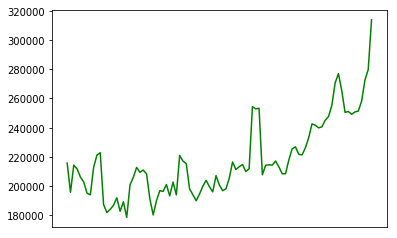

In [30]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Plot our line that will be used to track a wrestler's wins over the years
fig,ax=plt.subplots()
ax.plot(Zip1['index'], Zip1[81] , color="green", label="Zip1")

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(Zip1['index'][0], 'Y')
datemax = np.datetime64(Zip1['index'][92], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.grid(True)
plt.show()

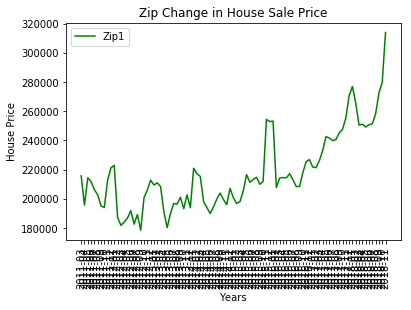

In [31]:
years=['2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01',
 '2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02',
 '2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04',
 '2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06',
 '2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07',
 '2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07',
 '2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07',
 '2018-08','2018-09','2018-10','2018-11']

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(Zip1['index'],Zip1[81] , color="green", label="Zip1")
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Zip Change in House Sale Price")
plt.xlabel("Years")
plt.ylabel('House Price')
plt.xticks(years,rotation='vertical')

# Print our chart to the screen
plt.show()

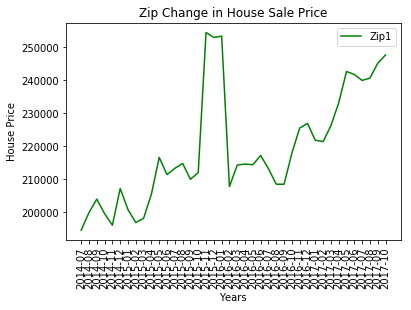

In [32]:
# Create a list of the years that we will use as our x axis
years = ['2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06',
 '2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07',
 '2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07',
 '2017-08','2017-09','2017-10']

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, Zip2 , color="green", label="Zip1")
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Zip Change in House Sale Price")
plt.xlabel("Years")
plt.ylabel('House Price')
plt.xticks(years,rotation='vertical')

# Print our chart to the screen
plt.show()

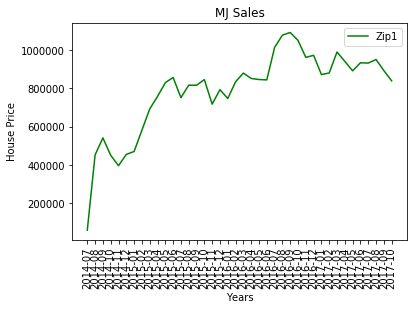

In [33]:

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, Zip1_mj , color="green", label="Zip1")
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("MJ Sales")
plt.xlabel("Years")
plt.ylabel('House Price')
plt.xticks(years,rotation='vertical')

# Print our chart to the screen
plt.show()